In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from SVM import BinarizedSVM

In [157]:
df = pd.read_csv('datasets/sonar.all-data',header=None)

In [158]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [61]:
df = df[~df.isin(['?']).any(axis=1)]

In [65]:
df.replace({'YES': 1, 'NO': 0}, inplace=True)

C:\Users\aless\AppData\Local\Temp\ipykernel_24572\1287446302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'YES': 1, 'NO': 0}, inplace=True)


In [85]:
df.replace({'CANAdiAN': 'CANADIAN'}, inplace=True)

C:\Users\aless\AppData\Local\Temp\ipykernel_24572\1634025553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'CANAdiAN': 'CANADIAN'}, inplace=True)


0,1,2,5,8 to remove
7 to remove? has only one sample with different value
9,10,12,14,17,18 to convert

In [154]:
df = pd.get_dummies(df, columns=[7,9,10,12,14,15,17,18]).drop(columns=[0,1,2,5,8])

In [155]:
df[39].replace({'band':1,'noband':-1})

0      1
3     -1
5     -1
6     -1
7     -1
      ..
424   -1
426   -1
427   -1
428   -1
429    1
Name: 39, Length: 277, dtype: int64

In [21]:
# trasformo le etichette da [1,2] a [-1,1]
y = df[13].values
# prendo solo le prime 6 colonne, che corrispondono a quelle delle feature
X = df.values[:,:13]

In [22]:
X = MinMaxScaler().fit_transform(X)

In [23]:
X.shape

(297, 13)

In [24]:
svm = BinarizedSVM(C=10, verbose=True)
svm.fit(X, y)
y_pred = svm.predict(X)
accuracy_score(y, y_pred)

Nomi delle variabili: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
initializing F...
iteration 0----------------------------------------------------------------------------------------------------
scelgo le soglie per 0...
soglie trovate: b_plus:0.125	 b_minus:0.9999999999999999
scelgo le soglie per 1...
soglie trovate: b_plus:1.0	 b_minus:1.0
scelgo le soglie per 2...
soglie trovate: b_plus:0.3333333333333333	 b_minus:1.0
scelgo le soglie per 3...
soglie trovate: b_plus:0.05660377358490576	 b_minus:1.0
scelgo le soglie per 4...
soglie trovate: b_plus:0.052511415525114125	 b_minus:0.9999999999999998
scelgo le soglie per 5...
soglie trovate: b_plus:1.0	 b_minus:1.0
scelgo le soglie per 6...
soglie trovate: b_plus:0.5	 b_minus:1.0
scelgo le soglie per 7...
soglie trovate: b_plus:0.18320610687022898	 b_minus:0.9999999999999999
scelgo le soglie per 8...
soglie trovate: b_plus:1.0	 b_minus:1.0
scelgo le soglie per 9...
soglie trovate: b_plus:0.016129032258064516	 b_m

0.18181818181818182

[(0.23967551622418884, -1.999999999994527), (0.15707964601769914, 0.1719018695663103), (0.15707964601769914, 0.1719018695663103), (0.1489675516224189, -0.05757136270704731)]
[(0.29232747535362197, 1.6854450582420217), (0.12944706386626664, -1.668223928106028), (0.126018002571796, -1.9999999999898197), (0.12216030861551651, -1.4697621621463046)]
[(0.10775295663600526, -1.4013714722524004), (0.10315374507227332, -1.208631007818878)]
[(0.11008083689966716, 1.8335898137712263), (0.09094151212553496, 0.3970499605669046), (0.06538278649548267, 0.6363100240398784), (0.0423204945316215, -1.9999999999468256)]
[(0.38118184123763627, -1.5038672281002714), (0.1600304336799391, 1.9999999999738476), (0.14151661171696675, 1.8879438920716005), (0.08217093583565813, 1.9999999999446016)]
[(0.5764579414135985, -2.0234553991929647), (0.4608976081698469, -1.8050039888533838), (0.2472453641494222, 1.786009460736869), (0.22023649556570815, 0.7426678003433876)]
[(0.6823593073593075, -1.8109606388777162), (0.5

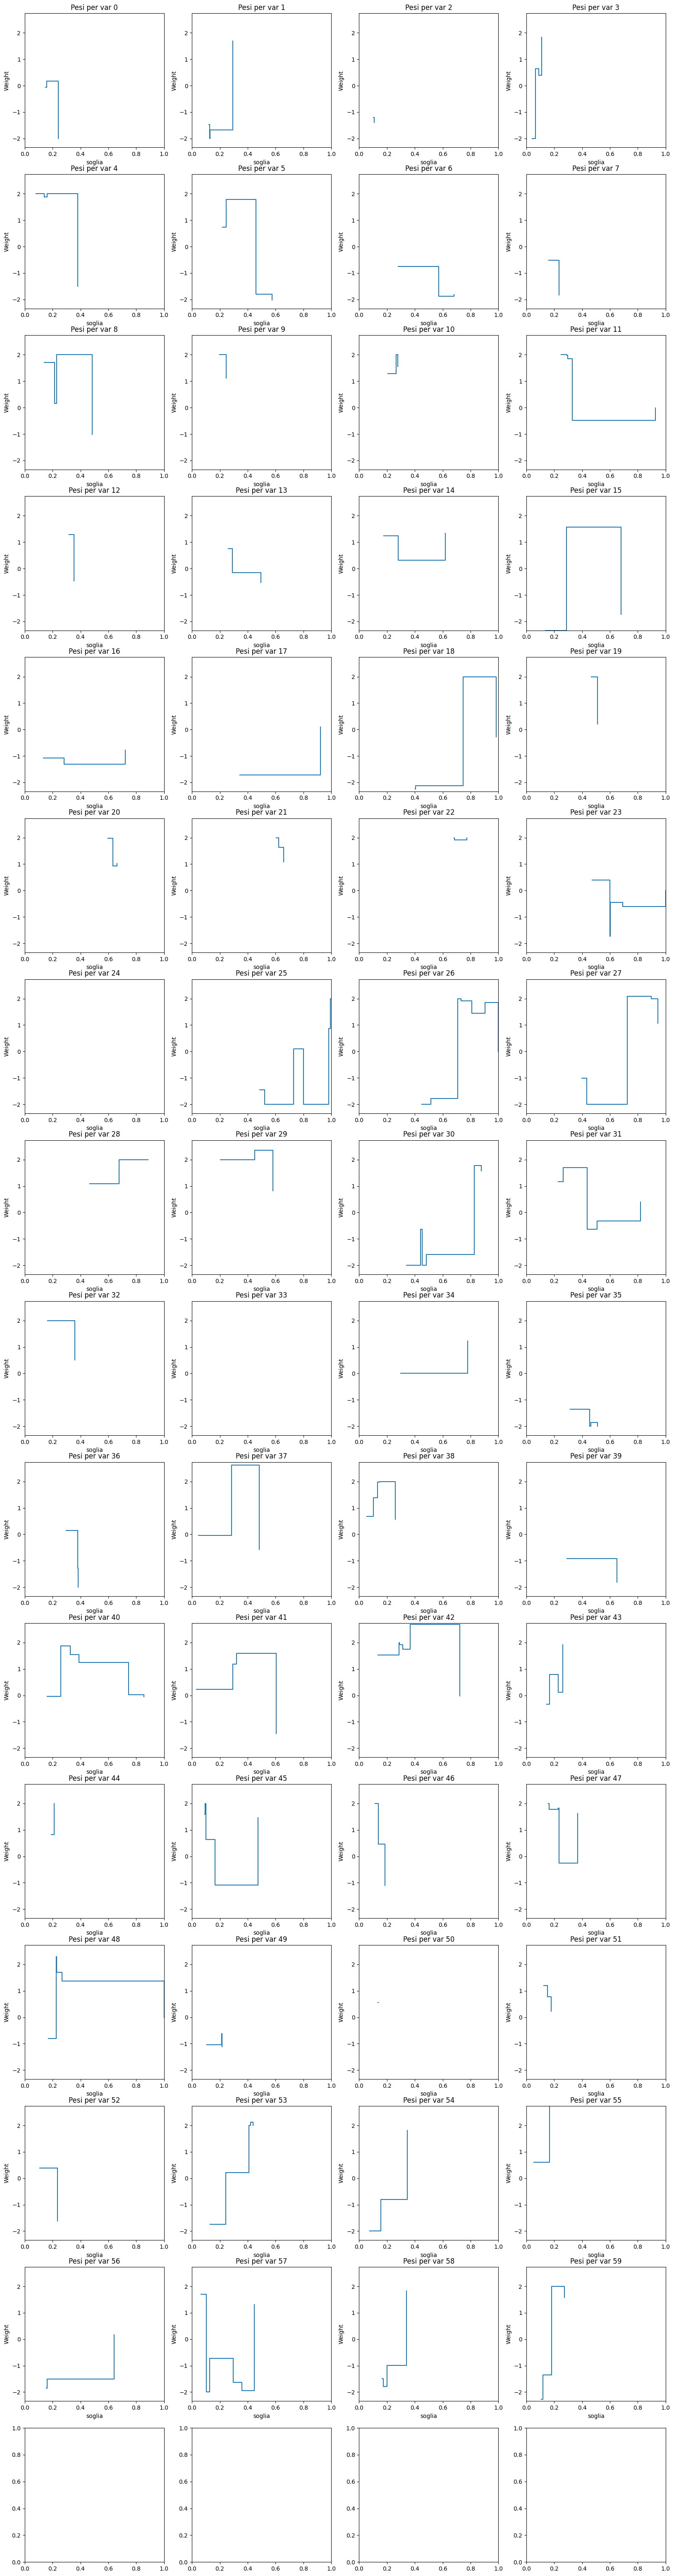

In [38]:
svm.visualizza_soglie()

In [25]:
from sklearn.svm import SVC

In [28]:
svc = SVC(C=1000)
svc.fit(X, y)
accuracy_score(svc.predict(X), y)

1.0